In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

In [4]:
HRD_pan_cancer = pd.read_csv('../../HRD_score/data/HRD_scores_pan_cancer_annotated_v2.csv', sep=',', header = 0)
primary = HRD_pan_cancer[HRD_pan_cancer['Type'] == 'Primary']

In [39]:
def runDBSCAN_n2(data):
    
    #data_hrd = data['HRD_sum'].to_numpy().reshape(-1, 1)
    data_hrd = data[['TAI', 'LST', 'LOH']].to_numpy()
    np.random.seed(42)
    dbscan = DBSCAN(eps=2, min_samples=3)

    
    labels = dbscan.fit_predict(data_hrd)

    # Get the number of clusters found
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    

    min_values = [np.min(data_hrd[labels == label]) for label in np.unique(labels)]
    # Print the results
    print("Data:", data_hrd.flatten())
    print("Labels:", labels)
    print("Number of clusters:", n_clusters)
    print(min_values)

In [43]:
luad = primary[primary['Project ID'] == 'TCGA-SARC']
#runDBSCAN_n2(luad)

In [46]:
from sklearn.cluster import MeanShift

# Generate random 1D data
np.random.seed(0)
data = luad['HRD_sum'].to_numpy().reshape(-1, 1)

# Reshape the data to a 2D array


# Create and fit the MeanShift model

ms = MeanShift()
ms.fit(data)

# Get the cluster labels and cluster centers
labels = ms.labels_
centers = ms.cluster_centers_

max_number = int(max(list(luad['HRD_sum'])))
numbers_vector = np.arange(max_number + 1).reshape(-1, 1)
labels_numbers = ms.predict(numbers_vector).reshape(-1, 1)

# Find the minimum value for each label
min_values = [np.min(numbers_vector[labels_numbers == label]) for label in np.unique(labels_numbers)]


# Print the cluster labels and centers
print("Cluster labels:", labels)
print("Cluster centers:", centers)
print(min_values)

Cluster labels: [0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1]
Cluster centers: [[34.92380952]
 [11.93684211]]
[24, 0]


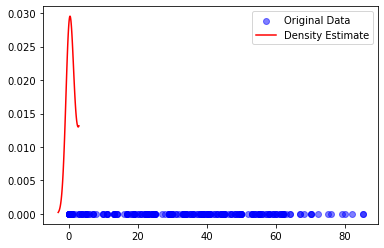

In [48]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
# Generate random 1D data
np.random.seed(0)
data = luad['HRD_sum'].to_numpy().reshape(-1, 1)



# Create and fit the KernelDensity model
bandwidth = 1.0  # The bandwidth parameter controls the width of the kernel
kde = KernelDensity(bandwidth=bandwidth)
kde.fit(data)

# Generate new data points from the fitted KDE model
new_data = np.linspace(-3, 3, 100).reshape(-1, 1)

# Compute the log density estimate for new data
log_dens = kde.score_samples(new_data)

# Plot the data and density estimate
plt.scatter(data, np.zeros_like(data), label='Original Data', color='blue', alpha=0.5)
plt.plot(new_data, np.exp(log_dens), label='Density Estimate', color='red')
plt.legend()
plt.show()

In [54]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# Generate some random 1D data
#data = luad['HRD_sum'].to_numpy().reshape(-1, 1)
data = luad[['TAI', 'LST', 'LOH']].to_numpy()
# Create AgglomerativeClustering object
agg_clustering = AgglomerativeClustering(n_clusters=2)

# Fit the data
labels = agg_clustering.fit_predict(data)

min_values = []
for label in set(labels):
    cluster_data = data[labels == label]
    min_value = np.min(cluster_data)
    min_values.append(min_value)

silhouette_avg = silhouette_score(data, labels)

# Print the Silhouette Score
print("Silhouette Score:", silhouette_avg)
    
# Print the results
print("Data:", data.flatten())
print("Labels:", labels)
print("Minimum value for each label:", min_values)

Silhouette Score: 0.47262312650235344
Data: [23. 20. 13. 33. 18. 16.  7. 10. 13. 15.  7. 11. 29. 28. 13. 12. 10. 15.
 26. 15. 14.  5.  1.  4. 23. 12. 20. 26. 20.  9. 18. 22.  8. 29. 23. 10.
  4.  4.  5. 18. 12. 10.  5.  2.  6.  2.  4.  0.  0.  0.  0. 33. 21. 13.
 11.  2.  7. 26. 12.  5. 11.  4. 10. 22. 11. 16. 22. 17. 11. 25. 12.  7.
  6.  2.  3. 23. 13.  9.  1.  2.  4. 21. 13.  4. 16. 10.  8. 18. 10. 17.
 18.  9. 14. 15. 13. 11. 20. 13. 11.  0.  1.  0. 18.  9. 12.  7.  5.  9.
  7.  5.  7. 19.  8.  7.  8.  5.  8. 10.  5.  9. 12. 12. 11. 23. 14.  8.
 19.  4. 16. 17. 11. 10. 12.  8. 10.  0.  0.  0. 24. 26.  4. 15. 14. 14.
  5.  4.  1.  1.  2.  0. 11.  7.  7.  3.  0.  4. 13.  3.  8.  1.  0.  2.
 13. 18. 14. 15. 10. 12. 29. 14. 19. 15.  8. 13.  0.  0.  0. 20. 12.  1.
 22.  7. 13.  0.  1.  0.  2.  1.  2.  5. 12.  1. 14. 11.  4. 13.  5.  7.
 14.  3.  6. 14.  3. 12. 24.  9. 22.  4.  1.  2. 23. 27. 12. 30. 19. 30.
 12. 16. 14. 18. 13.  3. 33. 30. 17. 11.  4.  7.  0.  1.  0. 16. 12.  1.
  0.  0